In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### N stands for Nitrogen
##### P stands for Phosphorous
##### K stands for Potassium

In [2]:
df = pd.read_csv('Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
corr_df = df.drop('label', axis='columns')
corr_df

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [4]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
corr_df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


##### From the correlation plot it is observed that Potassium(k) and Phophorous(P) have the strongest correlation of 0.73

<Axes: title={'center': 'The Heatmap of the correlations between parameters'}>

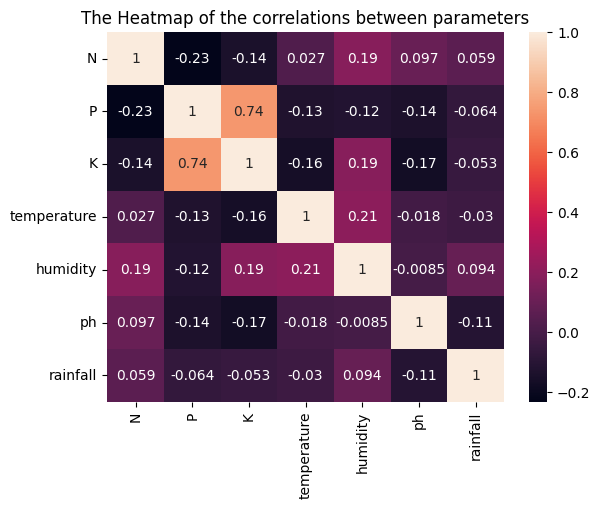

In [6]:
plt.title('The Heatmap of the correlations between parameters')
sns.heatmap(corr_df.corr(), annot=True)

Text(0, 0.5, 'Pottassium')

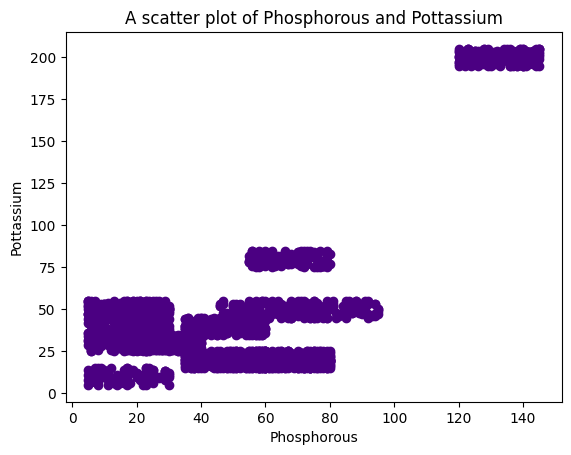

In [7]:
plt.title('A scatter plot of Phosphorous and Pottassium')
plt.scatter(df['P'], df['K'], color='indigo')
plt.xlabel('Phosphorous')
plt.ylabel('Pottassium')


In [8]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

##### Get the Label Encode Values of the label column, which includes labels like Rice, Coconut, Papaya etc.

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(['rice', 'maize', 'jute', 'cotton', 'coconut', 'papaya', 'orange', 'apple', 'muskmelon', 'watermelon', 'grapes', 'mango', 'banana', 'pomegranate', 'lentil', 'blackgram', 'mungbean', 'mothbeans', 'pigeonpeas', 'kidneybeans', 'chickpea', 'coffee'])
df['label'] = label_encoder.transform(df['label'])

In [15]:
list(label_encoder.classes_)

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

In [10]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [17]:
from sklearn.ensemble import StackingClassifier

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = df.drop('label', axis='columns')
y = df['label']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [21]:
from sklearn.ensemble import StackingClassifier
stacking_classifier =StackingClassifier(
    estimators=[
        ('RandomForest', RandomForestClassifier()),
        ('DecisionTrees', DecisionTreeClassifier()),
        ('SupportVectors', SVC()),
        ('LogisticRegression', LogisticRegression()),
        ('KNN', KNeighborsClassifier())
    ],
    final_estimator= MLPClassifier(),
    cv=5
)
stacking_classifier.fit(x_train, y_train)

c:\Users\TeeFaith\anaconda3\envs\kenny\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\TeeFaith\anaconda3\envs\kenny\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

StackingClassifier(cv=5,
                   estimators=[('RandomForest', RandomForestClassifier()),
                               ('DecisionTrees', DecisionTreeClassifier()),
                               ('SupportVectors', SVC()),
                               ('LogisticRegression', LogisticRegression()),
                               ('KNN', KNeighborsClassifier())],
                   final_estimator=MLPClassifier())

In [22]:
stacking_classifier.score(x_test, y_test)

0.9927272727272727

In [23]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [38]:
input_array = np.array((104, 18, 30, 23.603016, 60.396475, 6.779833, 140.937))
input_array

array([104.      ,  18.      ,  30.      ,  23.603016,  60.396475,
         6.779833, 140.937   ])

In [39]:
reshaped_array = input_array.reshape(1, -1)
reshaped_array

array([[104.      ,  18.      ,  30.      ,  23.603016,  60.396475,
          6.779833, 140.937   ]])

In [40]:
predict = stacking_classifier.predict(reshaped_array)
if predict == [5]:
    print('This AI recommends coffee')
else:
    print('This AI classifies wrongly at the moment')

This AI recommends coffee


c:\Users\TeeFaith\anaconda3\envs\kenny\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\TeeFaith\anaconda3\envs\kenny\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\TeeFaith\anaconda3\envs\kenny\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\TeeFaith\anaconda3\envs\kenny\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\TeeFaith\anaconda3\envs\kenny\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [42]:
import joblib

In [43]:
joblib.dump(stacking_classifier, 'crop_model.pkl')

['crop_model.pkl']

In [44]:
model = joblib.load('crop_model.pkl')

In [45]:
model.predict(reshaped_array)

c:\Users\TeeFaith\anaconda3\envs\kenny\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\TeeFaith\anaconda3\envs\kenny\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\TeeFaith\anaconda3\envs\kenny\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\TeeFaith\anaconda3\envs\kenny\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\TeeFaith\anaconda3\envs\kenny\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([5])